In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import scipy.integrate as integrate
import warnings
import sympy as smp
from ipywidgets import interact

In [46]:
def N(param_tau):
    
    eps, gamma, mu, tetta, c_0, tau_0 = 1, 1, 1, 1, 1, 1
    
    y, tau = smp.symbols('y tau')
    funcN = eps * gamma * mu * smp.exp(smp.I * tetta) * ( (tau - tau_0) / mu - smp.I ) / (4 * y / mu - (c_0 * (tau - tau_0) / mu - smp.I) ** 2)**(3/2)
    first_der_funcN_tau = funcN.diff(tau)
    sec_der_funcN_tau   = first_der_funcN_tau.diff(tau)
    first_der_funcN_y   = funcN.diff(y)
    sec_der_funcN_y     = first_der_funcN_y.diff(y)
        
    lmbd_sec_funcN_tau = smp.lambdify((y, tau), sec_der_funcN_tau, "numpy")
    lmbd_sec_funcN_y   = smp.lambdify((y, tau), sec_der_funcN_y  , "numpy")
    lmbd_funcN         = smp.lambdify((y, tau), funcN, "numpy")
    
    arr_y = np.linspace(-100, 100, 10000)
    
    vals_sec_funcN_tau = lmbd_sec_funcN_tau(arr_y, param_tau)
    vals_sec_funcN_y   = lmbd_sec_funcN_y(arr_y, param_tau)
    vals_funcN = np.real(lmbd_funcN(arr_y, param_tau))
    
    R = np.real(vals_sec_funcN_tau - vals_sec_funcN_y)
    
    fig = plt.figure(figsize=(5, 5))
    plt.grid()
    plt.xlim([-1, 1])
    plt.ylim([-5, 5])
    plt.plot(arr_y, R, color="red")
    plt.plot(arr_y, vals_funcN, color="black")
    plt.show()
    
interact(N, param_tau=(-5, 5, 0.01))    

interactive(children=(FloatSlider(value=0.0, description='param_tau', max=5.0, min=-5.0, step=0.01), Output())…

<function __main__.N(param_tau)>

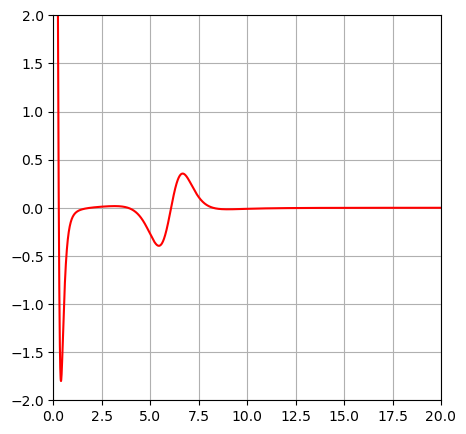

In [23]:
def N(param_y, param_tau):
    
    eps, gamma, mu, tetta, c_0, tau_0 = 1, 1, 1, 1, 1, 1
    
    y, tau = smp.symbols('y tau')
    funcN = eps * gamma * mu * smp.exp(smp.I * tetta) * ( (tau - tau_0) / mu - smp.I ) / (4 * y / mu - (c_0 * (tau - tau_0) / mu - smp.I) ** 2)**(3/2)
    first_der_funcN_tau = funcN.diff(tau)
    sec_der_funcN_tau   = first_der_funcN_tau.diff(tau)
    first_der_funcN_y   = funcN.diff(y)
    sec_der_funcN_y     = first_der_funcN_y.diff(y)
        
    lmbd_sec_funcN_tau = smp.lambdify((y, tau), sec_der_funcN_tau, "numpy")
    lmbd_sec_funcN_y   = smp.lambdify((y, tau), sec_der_funcN_y  , "numpy")
    
    vals_sec_funcN_tau = lmbd_sec_funcN_tau(param_y, param_tau)
    vals_sec_funcN_y   = lmbd_sec_funcN_y(param_y, param_tau)
    
    R = np.real(vals_sec_funcN_tau - vals_sec_funcN_y)
    
    fig = plt.figure(figsize=(5, 5))
    plt.grid()
    plt.xlim([0, 20])
    plt.ylim([-2, 2])
    plt.plot(param_y, R, color="red")
    plt.show()
    
p_y = np.linspace(0.1, 100, 10000)
p_tau = np.linspace(0, 100, 10000)

N(p_y, p_tau)